In [8]:
import pandas as pd
import pandas_profiling
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

# データを読み込む
# "input/type_Ia_lt_001.csv"は，typeIaのうちz>0.001のもの．
data = pd.read_csv("input/type_Ia_lt_001.csv")

print(data.count())
print(data.head(10))

Name          15434
Disc. Date    15228
Host Name      6825
z             15434
dL (Mpc)      15434
Type          15434
dtype: int64
        Name  Disc. Date     Host Name                         z  dL (Mpc)  \
0    SN1972E  1972/05/06      NGC 5253                  0.001358    2.7000   
1    SN1895B  1895/07/07      NGC 5253                    0.0014    2.7000   
2    SN1986G  1986/05/03      NGC 5128  0.00183,0.000848,0.00103    2.8000   
3    SN1937C  1937/08/16       IC 4182         0.001071,0.001071    3.0000   
4    SN1983N  1983/07/03      NGC 5236   0.00308,0.00321,0.00171    4.3000   
5  SN2021abt  2021/01/10  LEDA 1022096                  0.001429    6.3312   
6   SN2012cg  2012/05/17      NGC 4424                  0.001458    6.4598   
7    SN1937D  1937/09/09      NGC 1003                   0.00518    8.0000   
8    SN1971I  1971/05/24      NGC 5055           0.00131,0.00344    8.0000   
9   SN2010el  2010/06/19      NGC 1566               0.005,0.005    8.0000   

      Ty

In [9]:
# 何も"z"と"dL (Mpc)"に何も入っていないやつを落とす．（データ数が変わっていないので，意味がなかった．）
data.dropna(subset=['z','dL (Mpc)'], inplace=True)
# zの中に","で区切られて複数のデータがあるものがあるが，それを分割して捨て去る．（特に平均などは取っていない）
data_a = data["z"].str.split(",", expand=True)
# ","が入っていたせいで，データ型がstringだったので，floatに変換して元のデータに戻す．
data["z"] = data_a[0].astype(float)
print(data.count())
print(data.head(10))

Name          15434
Disc. Date    15228
Host Name      6825
z             15434
dL (Mpc)      15434
Type          15434
dtype: int64
        Name  Disc. Date     Host Name         z  dL (Mpc)     Type
0    SN1972E  1972/05/06      NGC 5253  0.001358    2.7000       Ia
1    SN1895B  1895/07/07      NGC 5253  0.001400    2.7000       Ia
2    SN1986G  1986/05/03      NGC 5128  0.001830    2.8000  Ia-91bg
3    SN1937C  1937/08/16       IC 4182  0.001071    3.0000       Ia
4    SN1983N  1983/07/03      NGC 5236  0.003080    4.3000       Ib
5  SN2021abt  2021/01/10  LEDA 1022096  0.001429    6.3312       Ia
6   SN2012cg  2012/05/17      NGC 4424  0.001458    6.4598       Ia
7    SN1937D  1937/09/09      NGC 1003  0.005180    8.0000       Ia
8    SN1971I  1971/05/24      NGC 5055  0.001310    8.0000       Ia
9   SN2010el  2010/06/19      NGC 1566  0.005000    8.0000  Ia-02cx


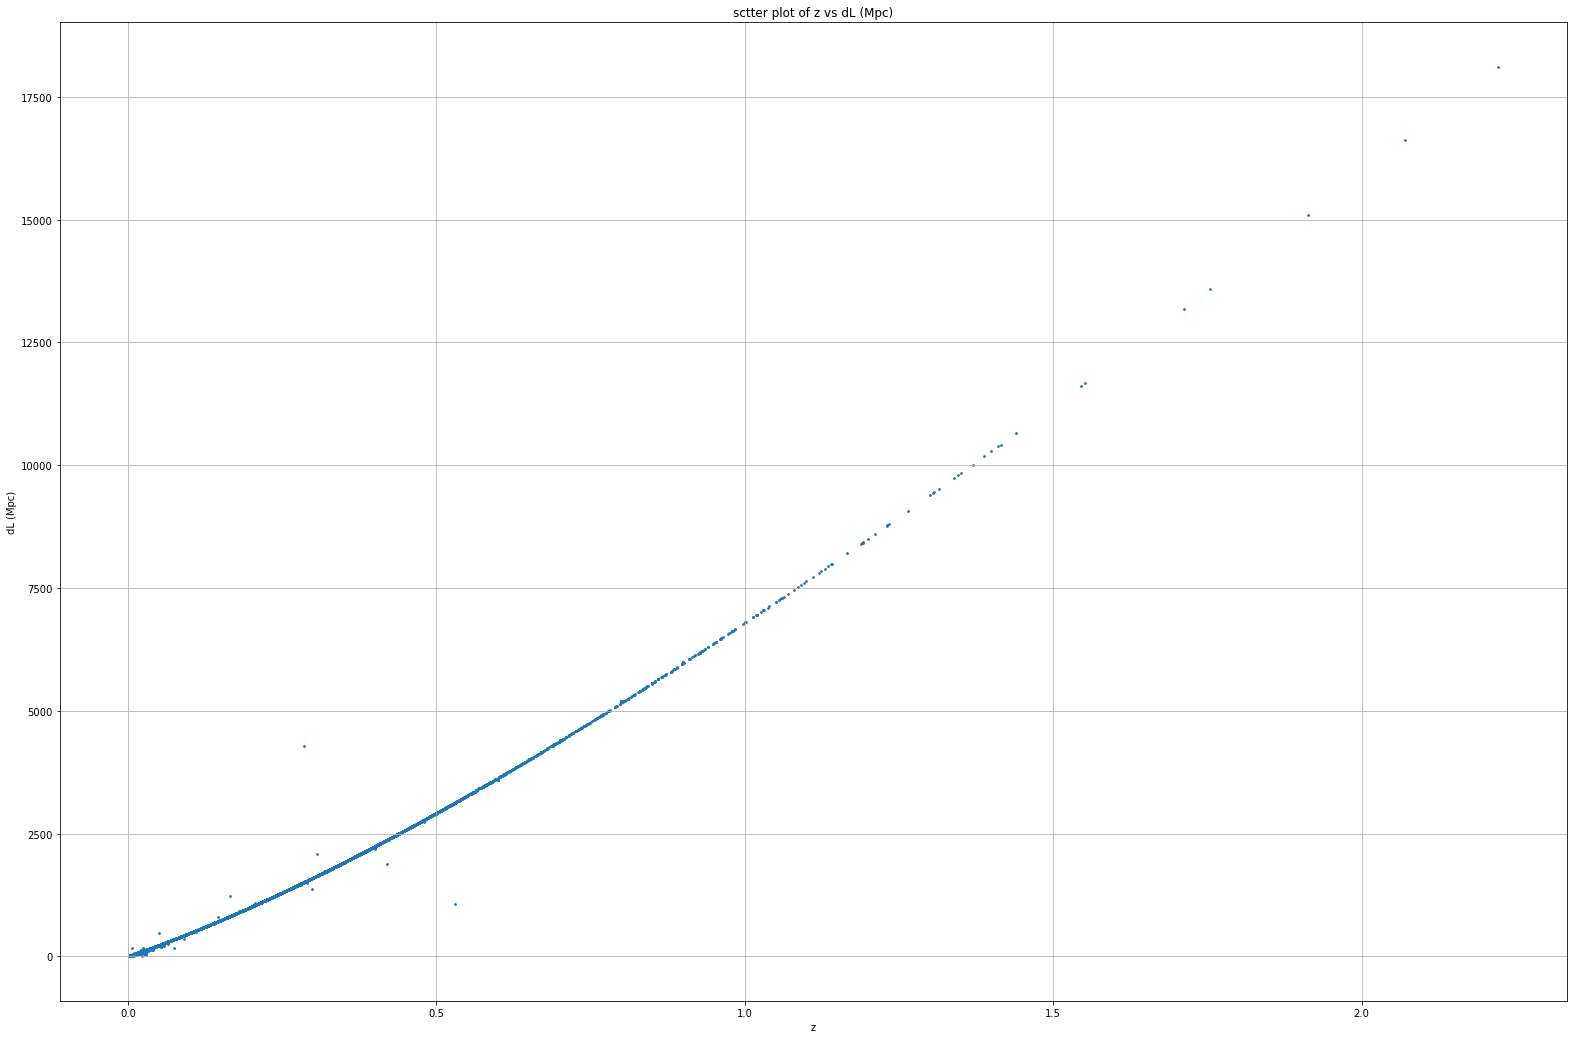

In [10]:
# プロットする．
x = data["z"]
y = data["dL (Mpc)"]
plt.scatter(x,y,s=3)
plt.rcParams["figure.figsize"] = [27,18]
plt.xlabel("z")
plt.ylabel("dL (Mpc)")
plt.title("sctter plot of z vs dL (Mpc)")
plt.grid()
plt.show()